tmp# World Data League 2021
## Notebook Template

This notebook is one of the mandatory deliverables when you submit your solution (alongside the video pitch). Its structure follows the WDL evaluation criteria and it has dedicated cells where you can add descriptions. Make sure your code is readable as it will be the only technical support the jury will have to evaluate your work.

The notebook must:

*   💻 have all the code that you want the jury to evaluate
*   🧱 follow the predefined structure
*   📄 have markdown descriptions where you find necessary
*   👀 be saved with all the output that you want the jury to see
*   🏃‍♂️ be runnable


## Authors
Write the name (first and last) of the people on your team that are responsible for developing this solution.

## External links and resources
Paste here all the links to external resources that are necessary to understand and run your code. Add descriptions to make it clear how to use them during evaluation.

## Introduction
Describe how you framed the challenge by telling us what problem are you trying to solve and how your solution solves that problem.

## Development
Start coding here! 👩‍💻

Don't hesitate to create markdown cells to include descriptions of your work where you see fit, as well as commenting your code.

We know that you know exactly where to start when it comes to crunching data and building models, but don't forget that WDL is all about social impact...so take that into consideration as well.

In [2]:
import shapefile
import pandas as pd

def read_shapefile(shp_path):
    """
    Read a shapefile into a Pandas dataframe with a 'coords' column holding
    the geometry information. This uses the pyshp package
    """

    #read file, parse out the records and shapes
    sf = shapefile.Reader(shp_path)
    fields = [x[0] for x in sf.fields][1:]
    records = sf.records()
    shps = [s.points for s in sf.shapes()]

    #write into a dataframe
    df = pd.DataFrame(columns=fields, data=records)
    df = df.assign(coords=shps)

    return df, sf

In [3]:
tmp, shps  = read_shapefile('data/noise_sensor_GIS/Rilievi openoise.shp')

In [4]:
tmp

,Id,Sito,Indirizzo,Altezza,Dist_rifl,classe,coords
0,S_06,TOBIKE 77,C.so Marconi 27,2.55,NaN,0,"[[7.682554760183585, 45.05555104719157]]"
1,S_05,TOBIKE 75,Via Baretti 17,2.55,2.65,2,"[[7.681342896617653, 45.05758756276319]]"
2,S_03,Palo Luce,L.go Saluzzo,3.10,NaN,1,"[[7.678858751834246, 45.058497479969674]]"
3,S_02,ANCOSConfartigianato,"Via Principe Tommaso, 18 bis",5.10,1.00,3,"[[7.681567038956784, 45.05781641712768]]"
4,S_01,Polizia Municipale,Via Saluzzo 26,5.50,NaN,2,"[[7.679054445413965, 45.05924947407935]]"


In [5]:
tmp, shps  = read_shapefile('data/zipfolder/RUM_10_zon_acustica_Layer.shp')

In [6]:
# !pip3 install pyproj

In [22]:
sensor_list

,code,address,Lat,Long,streaming,Sensor_ID
0,s_01,"Via Saluzzo, 26 Torino",45.059172,7.678986,https://userportal.smartdatanet.it/userportal/...,C1
1,s_02,"Via Principe Tommaso, 18bis Torino",45.057837,7.681555,https://userportal.smartdatanet.it/userportal/...,C2
2,s_03,Largo Saluzzo Torino,45.058518,7.678854,https://userportal.smartdatanet.it/userportal/...,C3
3,s_05,Via Principe Tommaso angolo via Baretti Torino,45.057603,7.681348,https://userportal.smartdatanet.it/userportal/...,C4
4,s_06,"Corso Marconi, 27 Torino",45.055554,7.682590,https://userportal.smartdatanet.it/userportal/...,C5


In [30]:
# Link: https://webgis.arpa.piemonte.it/Geoviewer2D/?config=other-configs/acustica_config.json

mapping_location_area_code = pd.DataFrame(
    [['s_01', 65, 55, 'IV - Aree di intensa attività umana'],
    ['s_02', 60, 50, 'III - Aree di tipo misto'],
    ['s_03', 60, 50, 'III - Aree di tipo misto'],
    ['s_05', 65, 55, 'IV - Aree di intensa attività umana'],
    ['s_06', 60, 50, 'III - Aree di tipo misto']],
    columns=['code', 'day_max_db', 'night_max_db', 'area_type']
)

In [33]:
sensor_list = sensor_list.merge(mapping_location_area_code, on=['code'])

In [34]:
sensor_list

,code,address,Lat,Long,streaming,Sensor_ID,day_max_db,night_max_db,area_type
0,s_01,"Via Saluzzo, 26 Torino",45.059172,7.678986,https://userportal.smartdatanet.it/userportal/...,C1,65,55,IV - Aree di intensa attività umana
1,s_02,"Via Principe Tommaso, 18bis Torino",45.057837,7.681555,https://userportal.smartdatanet.it/userportal/...,C2,60,50,III - Aree di tipo misto
2,s_03,Largo Saluzzo Torino,45.058518,7.678854,https://userportal.smartdatanet.it/userportal/...,C3,60,50,III - Aree di tipo misto
3,s_05,Via Principe Tommaso angolo via Baretti Torino,45.057603,7.681348,https://userportal.smartdatanet.it/userportal/...,C4,65,55,IV - Aree di intensa attività umana
4,s_06,"Corso Marconi, 27 Torino",45.055554,7.682590,https://userportal.smartdatanet.it/userportal/...,C5,60,50,III - Aree di tipo misto


In [19]:
from pyproj import Proj, transform

inProj = Proj(init='epsg:32632')
outProj = Proj(init='epsg:4326')
x1,y1 = 393292.5102207266, 5020375.448912904
x2,y2 = transform(inProj,outProj,x1,y1)

print(x2, y2)

7.638295687093852 45.32876977229637


C:\Users\paulo\anaconda3\lib\site-packages\pyproj\crs\crs.py:68: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
C:\Users\paulo\anaconda3\lib\site-packages\pyproj\crs\crs.py:306: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  projstring = _prepare_from_string(" ".join((projstring, projkwargs)))
C:\Users\paulo\anaconda3\lib\site-packages\pyproj\crs\crs.py:68: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mi

In [10]:
y2

39.72785727727918

In [139]:
import arcgis

In [164]:
# Files list at http://webgis.arpa.piemonte.it/geoportale/index.php/tematiche/rumore-e-vibrazioni

import shapefile
import pandas as pd

tmp, shps  = read_shapefile('data/zipfolder/RUM_10_zon_acustica_Layer.shx')

In [146]:
tmp['coords'].values[0][0][0]

393292.5102207266

In [127]:
from shapely import geometry

poly = geometry.Polygon([[x[0], x[1]] for x in tmp['coords'].values[0]])

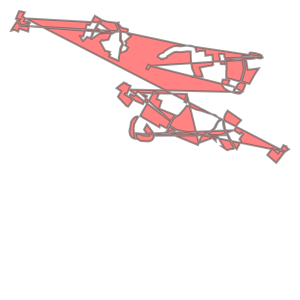

In [131]:
poly

In [111]:
import shapely.geometry

shape = shapely.geometry.asShape(shps)

ValueError: Unknown geometry type: featurecollection

In [132]:
tmp[tmp.COMUNE_TOP == 'Torino'].values[0]

array(['001272', 'Torino', 'D.G.C. Nï¿½2008-05372/126 del 26.08.2',
       13120244.3264459, 'I', '', 'Definitiva',
       'Aree particolarmente protette', 50, 40, 'TO', 13120244.3467,
       245257.897525,
       list([(394059.8376012322, 4984645.53167761), (394050.28146055783, 4984606.776110041), (394047.62087536405, 4984600.568125928), (394047.1354986226, 4984599.435588837), (394047.07121762756, 4984599.346506313), (394042.193695033, 4984592.593020653), (394041.98191228026, 4984592.299793741), (394041.24250036036, 4984591.560405104), (394041.20868171105, 4984591.558786933), (394036.56759887404, 4984591.3378565665), (394033.135606932, 4984591.649825289), (394029.64901276515, 4984591.966799351), (394029.3627807938, 4984592.152868903), (394020.06479023036, 4984598.196558525), (394013.5850953152, 4984603.430122976), (393991.0518852884, 4984621.812521415), (393973.8553864532, 4984642.566812187), (393950.72920334333, 4984664.507095696), (393930.56788565335, 4984676.366697078), (393914.871

In [2]:
import pandas as pd

In [20]:
sensor_list = pd.read_csv('data/noise_sensor_list.csv', sep = ';')
sensor_list['Sensor_ID'] = ['C1', 'C2', 'C3', 'C4', 'C5']

sensor_list['Lat'] = sensor_list['Lat'].str.replace(',', '.').astype(float)
sensor_list['Long'] = sensor_list['Long'].str.replace(',', '.').astype(float)

In [21]:
sensor_list

,code,address,Lat,Long,streaming,Sensor_ID
0,s_01,"Via Saluzzo, 26 Torino",45.059172,7.678986,https://userportal.smartdatanet.it/userportal/...,C1
1,s_02,"Via Principe Tommaso, 18bis Torino",45.057837,7.681555,https://userportal.smartdatanet.it/userportal/...,C2
2,s_03,Largo Saluzzo Torino,45.058518,7.678854,https://userportal.smartdatanet.it/userportal/...,C3
3,s_05,Via Principe Tommaso angolo via Baretti Torino,45.057603,7.681348,https://userportal.smartdatanet.it/userportal/...,C4
4,s_06,"Corso Marconi, 27 Torino",45.055554,7.682590,https://userportal.smartdatanet.it/userportal/...,C5


There are also two other noise sensors in the following locations, outside of San Salvario,
with an increasing busy nightlife: TTO-001, TT0-002 that are outside San Salvario. Ignored for now.

In [138]:
def load_noise_data(file_paths, sensor_list):
    """
    Function for loading noise data into the correct format
    """
    concat_data = []
    for file in file_paths:
        df = pd.read_csv(file, header=8, sep=';')
        df = df.melt(id_vars=['Data', 'Ora'])
        df['Timestamp'] = pd.to_datetime(df['Data'] + ' ' + df['Ora'])
        df.columns = ['Date', 'Time', 'Sensor_ID', 'Intensity', 'Timestamp']
        df['Intensity'] = df['Intensity'].str.replace(',', '.').astype(float)

        concat_data.append(df)

    concat_df = pd.concat(concat_data)

    output = concat_df.merge(sensor_list, on=['Sensor_ID'])
    return output[['Timestamp', 'Sensor_ID', 'Intensity', 'address', 'Lat', 'Long']]

In [139]:
data = load_noise_data(file_paths, sensor_list)

In [140]:
data

,Timestamp,Sensor_ID,Intensity,address,Lat,Long
0,2016-01-06 00:00:00,C1,61.1,"Via Saluzzo, 26 Torino",45.059172,7.678986
1,2016-01-06 01:00:00,C1,57.2,"Via Saluzzo, 26 Torino",45.059172,7.678986
2,2016-01-06 02:00:00,C1,52.5,"Via Saluzzo, 26 Torino",45.059172,7.678986
3,2016-01-06 03:00:00,C1,50.6,"Via Saluzzo, 26 Torino",45.059172,7.678986
4,2016-01-06 04:00:00,C1,47.4,"Via Saluzzo, 26 Torino",45.059172,7.678986
...,...,...,...,...,...,...
25675,2016-12-31 19:00:00,C5,61.8,"Corso Marconi, 27 Torino",45.055554,7.682590
25676,2016-12-31 20:00:00,C5,63.9,"Corso Marconi, 27 Torino",45.055554,7.682590
25677,2016-12-31 21:00:00,C5,59.2,"Corso Marconi, 27 Torino",45.055554,7.682590
25678,2016-12-31 22:00:00,C5,57.6,"Corso Marconi, 27 Torino",45.055554,7.682590


In [141]:
file_paths = ['data/noise_data/san_salvario_2016.csv']

# Exploratory Data Analysis

## Sensor Location

TODO: Description here about the sensors' proximity

In [142]:
import folium

m = folium.Map(location=[45.0530, 7.6798], zoom_start=15)

for indice, row in sensor_list.iterrows():
    folium.Marker(
        location=[row["Lat"], row["Long"]],
        popup=row['address'],
        icon=folium.Icon(color="red", icon='automobile', prefix='fa')
        ).add_to(m)

m

## Sazonality and regular behavior studies

In [143]:
import holidays
import numpy as np

it_holidays = holidays.CountryHoliday('Italy')

# We created a function to get some interesting date features, based on Pandas DataSeries predefined functions
def get_date_features(df_resampled, date_col, suffix, holidays_list):
    """
    Function for getting date features from a datetime column. 
    """
    df_resampled[f'day_{suffix}'] = df_resampled[date_col].dt.day
    df_resampled[f'hour_{suffix}'] = df_resampled[date_col].dt.hour
    df_resampled[f'month_{suffix}'] = df_resampled[date_col].dt.month
    df_resampled[f'dayofweek_{suffix}'] = df_resampled[date_col].dt.dayofweek
    # df_resampled[f'year_{suffix}'] = df_resampled[date_col].dt.year
    df_resampled[f'quarter_{suffix}'] = df_resampled[date_col].dt.quarter
    df_resampled[f'is_holiday_{suffix}'] = df_resampled[date_col].apply(lambda x: x in holidays_list)
    # df_resampled[f'is_year_end_{suffix}'] = df_resampled[date_col].dt.is_year_end
    df_resampled[f'is_weekend_{suffix}'] = np.where(df_resampled[f'dayofweek_{suffix}'].isin([5, 6]), 1, 0)
                                                  
    return df_resampled

df = get_date_features(df, date_col='Timestamp', suffix='today', holidays_list=it_holidays)

In [146]:
def dbmean(levels, axis=None):
    """
    Energetic average of levels.
    :param levels: Sequence of levels.
    :param axis: Axis over which to perform the operation.
    .. math:: L_{mean} = 10 \\log_{10}{\\frac{1}{n}\\sum_{i=0}^n{10^{L/10}}}
    """
    # levels = np.asanyarray(levels)
    return 10.0 * np.log10((10.0**(levels / 10.0)).mean(axis=axis))

In [147]:
#def average_log(x):
#    return 10 ** np.log(1 + np.mean(10**(x/10)))

In [159]:
avg_intensity_per_hour = df[df.Sensor_ID == 'C1'].groupby('hour_today')['Intensity'].apply(dbmean)

Text(0.5, 0, 'Hour of day (h)')

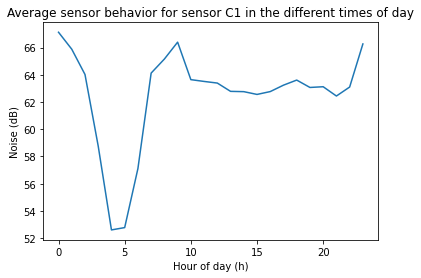

In [162]:
import matplotlib.pyplot as plt

plt.plot(np.arange(len(avg_intensity_per_hour)), avg_intensity_per_hour.values)
plt.title('Average sensor behavior for sensor C1 in the different times of day')
plt.ylabel('Noise (dB)')
plt.xlabel('Hour of day (h)')

In [102]:
# We create a function to create our targets
# As you can see, we created our target (label) based on a date offset (i.e., our label will be the intensity of the next day at the same time)
def create_target(df_resampled, date_col = 'Timestamp', target_col = 'Intensity', entity_id='Sensor_ID', date_offset = 24):
    """
    Function from creating lagged or future features for a specific date offset.
    For instance, this adds a new column with the intensity values 24 hours in the future, for each row, by default.    
    """
    
    df_resampled[f'date_col_{target_col}'] = df_resampled[date_col] + pd.DateOffset(hours=date_offset)
    tmp = df_resampled[[entity_id, date_col, f'date_col_{target_col}', target_col]].merge(
        df_resampled[[entity_id, date_col, f'date_col_{target_col}', target_col]], 
        left_on = [entity_id, f'date_col_{target_col}'], 
        right_on=[entity_id, date_col], 
        how='left'
    )

    tmp = tmp[[entity_id, f'{date_col}_x', f'{target_col}_y']]
    tmp.columns = [entity_id, date_col, f'target_{target_col}_{str(date_offset)}h']

    df_resampled = df_resampled.merge(tmp, on=[entity_id, date_col])
    
    return df_resampled

In [115]:
df = create_target(data, target_col='Intensity', date_offset=1)

In [110]:
df.head(3)

,Date,Time,Sensor_ID,Intensity,Timestamp,dateobserved_tomorrow,date_col_Intensity,target_Intensity_1h,day_today,hour_today,month_today,dayofweek_today,quarter_today,is_holiday_today,is_weekend_today
0,01-06-2016,00:00,C1,"61,1",2016-01-06 00:00:00,2016-01-06 01:00:00,2016-01-06 01:00:00,"57,2",6,0,1,2,1,True,0
1,01-06-2016,01:00,C1,"57,2",2016-01-06 01:00:00,2016-01-06 02:00:00,2016-01-06 02:00:00,"52,5",6,1,1,2,1,True,0
2,01-06-2016,02:00,C1,"52,5",2016-01-06 02:00:00,2016-01-06 03:00:00,2016-01-06 03:00:00,"50,6",6,2,1,2,1,True,0


## Conclusions

### Scalability and Impact
Tell us how applicable and scalable your solution is if you were to implement it in a city. Identify possible limitations and measure the potential social impact of your solution.

### Future Work
Now picture the following scenario: imagine you could have access to any type of data that could help you solve this challenge even better. What would that data be and how would it improve your solution? 🚀